# Proyecto Final: Prediccion de Dengue en Colombia

curso: Aprendizaje no supervisado

Projecto Final del curso.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar los datos

In [31]:
dengue_df = pd.read_csv("../data/dengue_data_all_municipalities.csv")
dengue_df.shape


(1121, 1017)

In [3]:
dengue_df.head(10)

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,0,0,0,1,1,1,0,0
5,5031,Amalfi,21363,21745,22124,22515,22937,23380,23787,24145,...,0,0,0,0,0,0,0,0,1,0
6,5034,Andes,41223,41480,41830,42159,42281,42105,42118,42328,...,0,0,0,0,1,0,0,0,0,0
7,5036,Angelópolis,7868,7966,8029,7973,7291,6102,5684,5651,...,0,0,0,0,0,0,0,0,0,0
8,5038,Angostura,10559,10441,10499,10611,10744,10884,11007,11096,...,0,0,0,0,0,0,0,0,0,0
9,5040,Anorí,10108,10305,10545,10776,11077,11471,12077,13067,...,1,0,0,0,0,1,0,1,0,0


In [4]:
print(dengue_df.columns.tolist())

['Municipality code', 'Municipality', 'Population2007', 'Population2008', 'Population2009', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Population2016', 'Population2017', 'Population2018', 'Population2019', 'Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018', 'Cases2019', 'Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)', 'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)', 'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 'Buildingstra

In [5]:
print(f"cantidad de Municipios: {len(dengue_df['Municipality'].unique())}")
print(f"cantidad de Municipio code: {len(dengue_df['Municipality code'].unique())}")

cantidad de Municipios: 1036
cantidad de Municipio code: 1121


In [6]:
dengue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Columns: 1017 entries, Municipality code to 2019/w52
dtypes: float64(313), int64(703), object(1)
memory usage: 8.7+ MB


In [7]:
dengue_df.isnull().sum().sort_values(ascending=False)

PRECIPITATION_oct_17    1
PRECIPITATION_apr_09    1
PRECIPITATION_dec_09    1
PRECIPITATION_nov_09    1
PRECIPITATION_oct_09    1
                       ..
2010/w37                0
2010/w38                0
2010/w39                0
2010/w40                0
2019/w52                0
Length: 1017, dtype: int64

In [8]:
len(dengue_df.columns[dengue_df.isna().any()].tolist())

288

In [9]:
dengue_df[dengue_df.isnull().any(axis=1)]

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
674,47570,Puebloviejo,25985,26261,26557,26828,27075,27320,27556,27835,...,1,0,0,2,0,1,0,1,0,0


In [10]:
dengue_df = dengue_df.dropna()
dengue_df.shape

(1120, 1017)

Tenemos un municipio sin datos de temperatura y precipitacion, podemos omitir este municipio de nuestro analisis.

In [11]:
dengue_df[dengue_df['Municipality code'].duplicated()]

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52


No hay duplicados

## Analisis descriptivo

In [12]:
dengue_df[['Population2007', 'Population2008', 'Population2009', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Population2016', 'Population2017', 'Population2018', 'Population2019']].describe()

,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,Population2017,Population2018,Population2019
count,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03,1.120000e+03
mean,3.831182e+04,3.873773e+04,3.915652e+04,3.957149e+04,3.997037e+04,4.034767e+04,4.070953e+04,4.106493e+04,4.143054e+04,4.184878e+04,4.230145e+04,4.306040e+04,4.407453e+04
std,2.350512e+05,2.373397e+05,2.395189e+05,2.416155e+05,2.435930e+05,2.453868e+05,2.467587e+05,2.478034e+05,2.486833e+05,2.497928e+05,2.511689e+05,2.540495e+05,2.601129e+05
min,0.000000e+00,1.270000e+02,1.270000e+02,1.290000e+02,1.440000e+02,1.590000e+02,1.720000e+02,1.920000e+02,2.100000e+02,2.240000e+02,2.430000e+02,2.790000e+02,2.880000e+02
25%,6.365500e+03,6.505000e+03,6.575750e+03,6.628500e+03,6.668000e+03,6.579750e+03,6.491000e+03,6.519500e+03,6.432750e+03,6.427000e+03,6.424250e+03,6.577250e+03,6.636500e+03
50%,1.199400e+04,1.220200e+04,1.232400e+04,1.251800e+04,1.258950e+04,1.254550e+04,1.266700e+04,1.267800e+04,1.266350e+04,1.270700e+04,1.266800e+04,1.276550e+04,1.281500e+04
75%,2.391675e+04,2.457975e+04,2.480550e+04,2.512375e+04,2.541325e+04,2.568250e+04,2.595625e+04,2.625700e+04,2.629075e+04,2.623850e+04,2.641025e+04,2.687725e+04,2.747125e+04
max,6.866363e+06,6.936977e+06,7.003434e+06,7.065669e+06,7.119281e+06,7.162261e+06,7.197326e+06,7.226652e+06,7.253823e+06,7.290415e+06,7.333415e+06,7.412566e+06,7.592871e+06


In [13]:
dengue_df[['Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018', 'Cases2019']].describe()

,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,36.582143,32.212500,46.378571,138.618750,26.675893,47.751786,111.308929,93.544643,85.568750,89.262500,22.364286,38.841964,113.231250
std,229.210360,163.028782,286.540394,784.956306,111.958658,211.543485,661.101501,399.807836,510.722281,797.613186,137.836907,162.624276,443.491883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,2.000000,2.000000,10.000000,2.000000,3.000000,9.000000,8.000000,8.000000,8.000000,2.000000,2.000000,10.000000
75%,9.000000,10.000000,12.250000,54.000000,12.000000,23.000000,51.250000,51.250000,44.000000,37.250000,10.000000,14.000000,75.000000
max,5223.000000,2816.000000,6335.000000,15570.000000,1724.000000,3128.000000,17539.000000,5855.000000,14523.000000,19414.000000,3710.000000,2687.000000,8258.000000


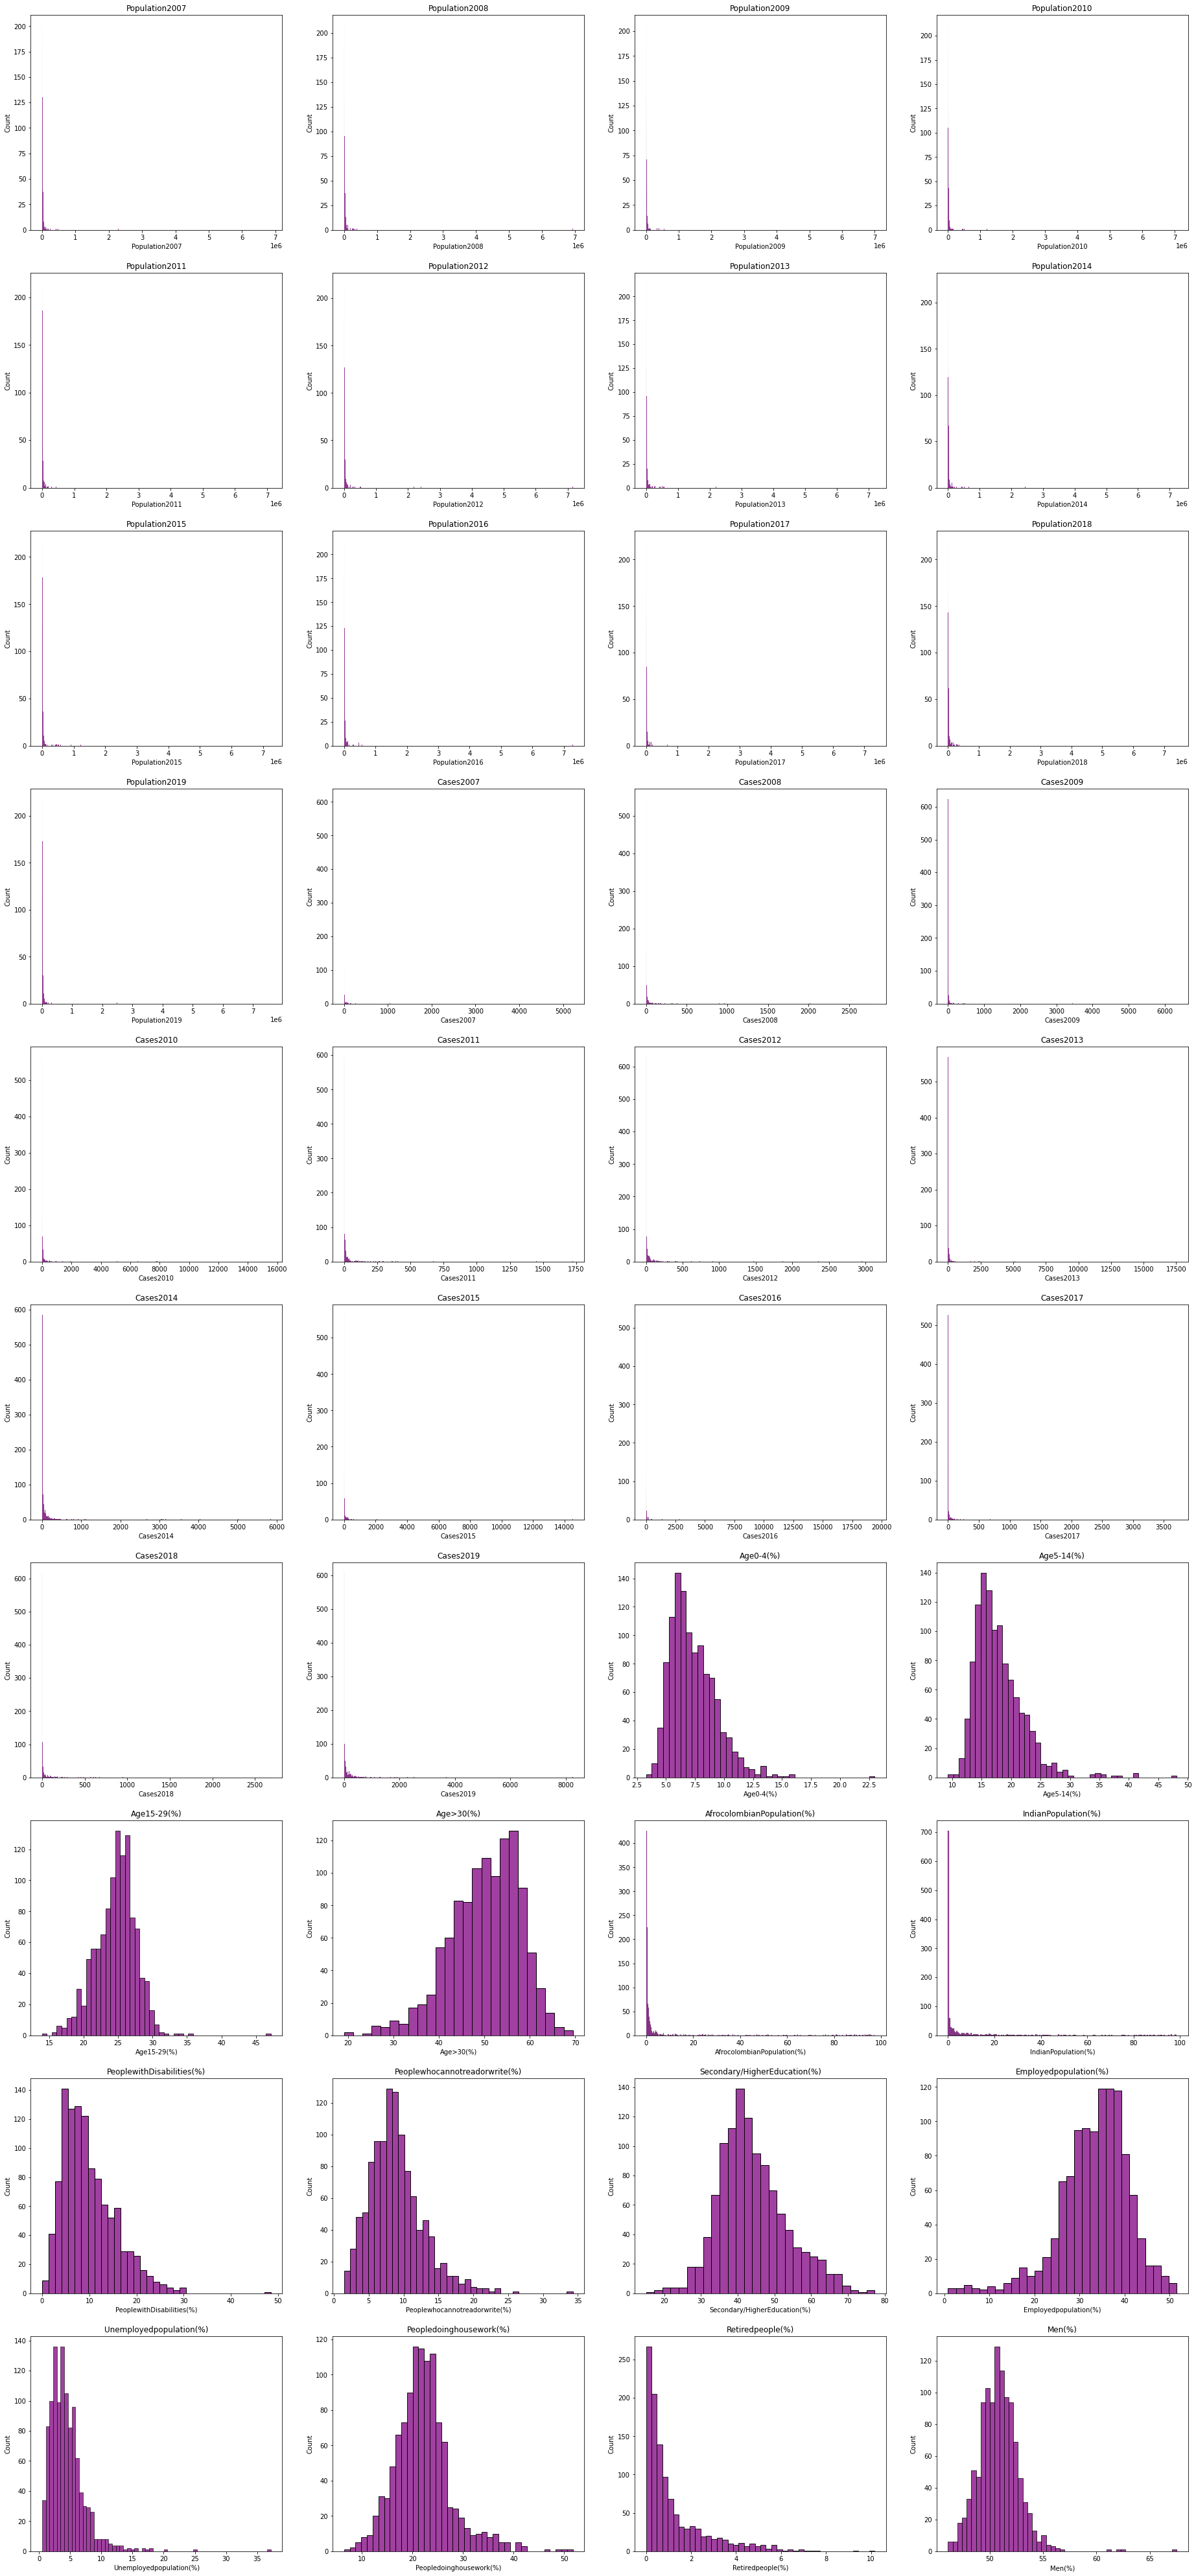

In [14]:
x = 10
y = 4

fig, ax = plt.subplots(x, y, figsize=(32, 72))
col = 0
column = dengue_df.drop(['Municipality code', 'Municipality'], axis=1).columns
for i in range(x):
    for j in range(y):
        sns.histplot(dengue_df[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

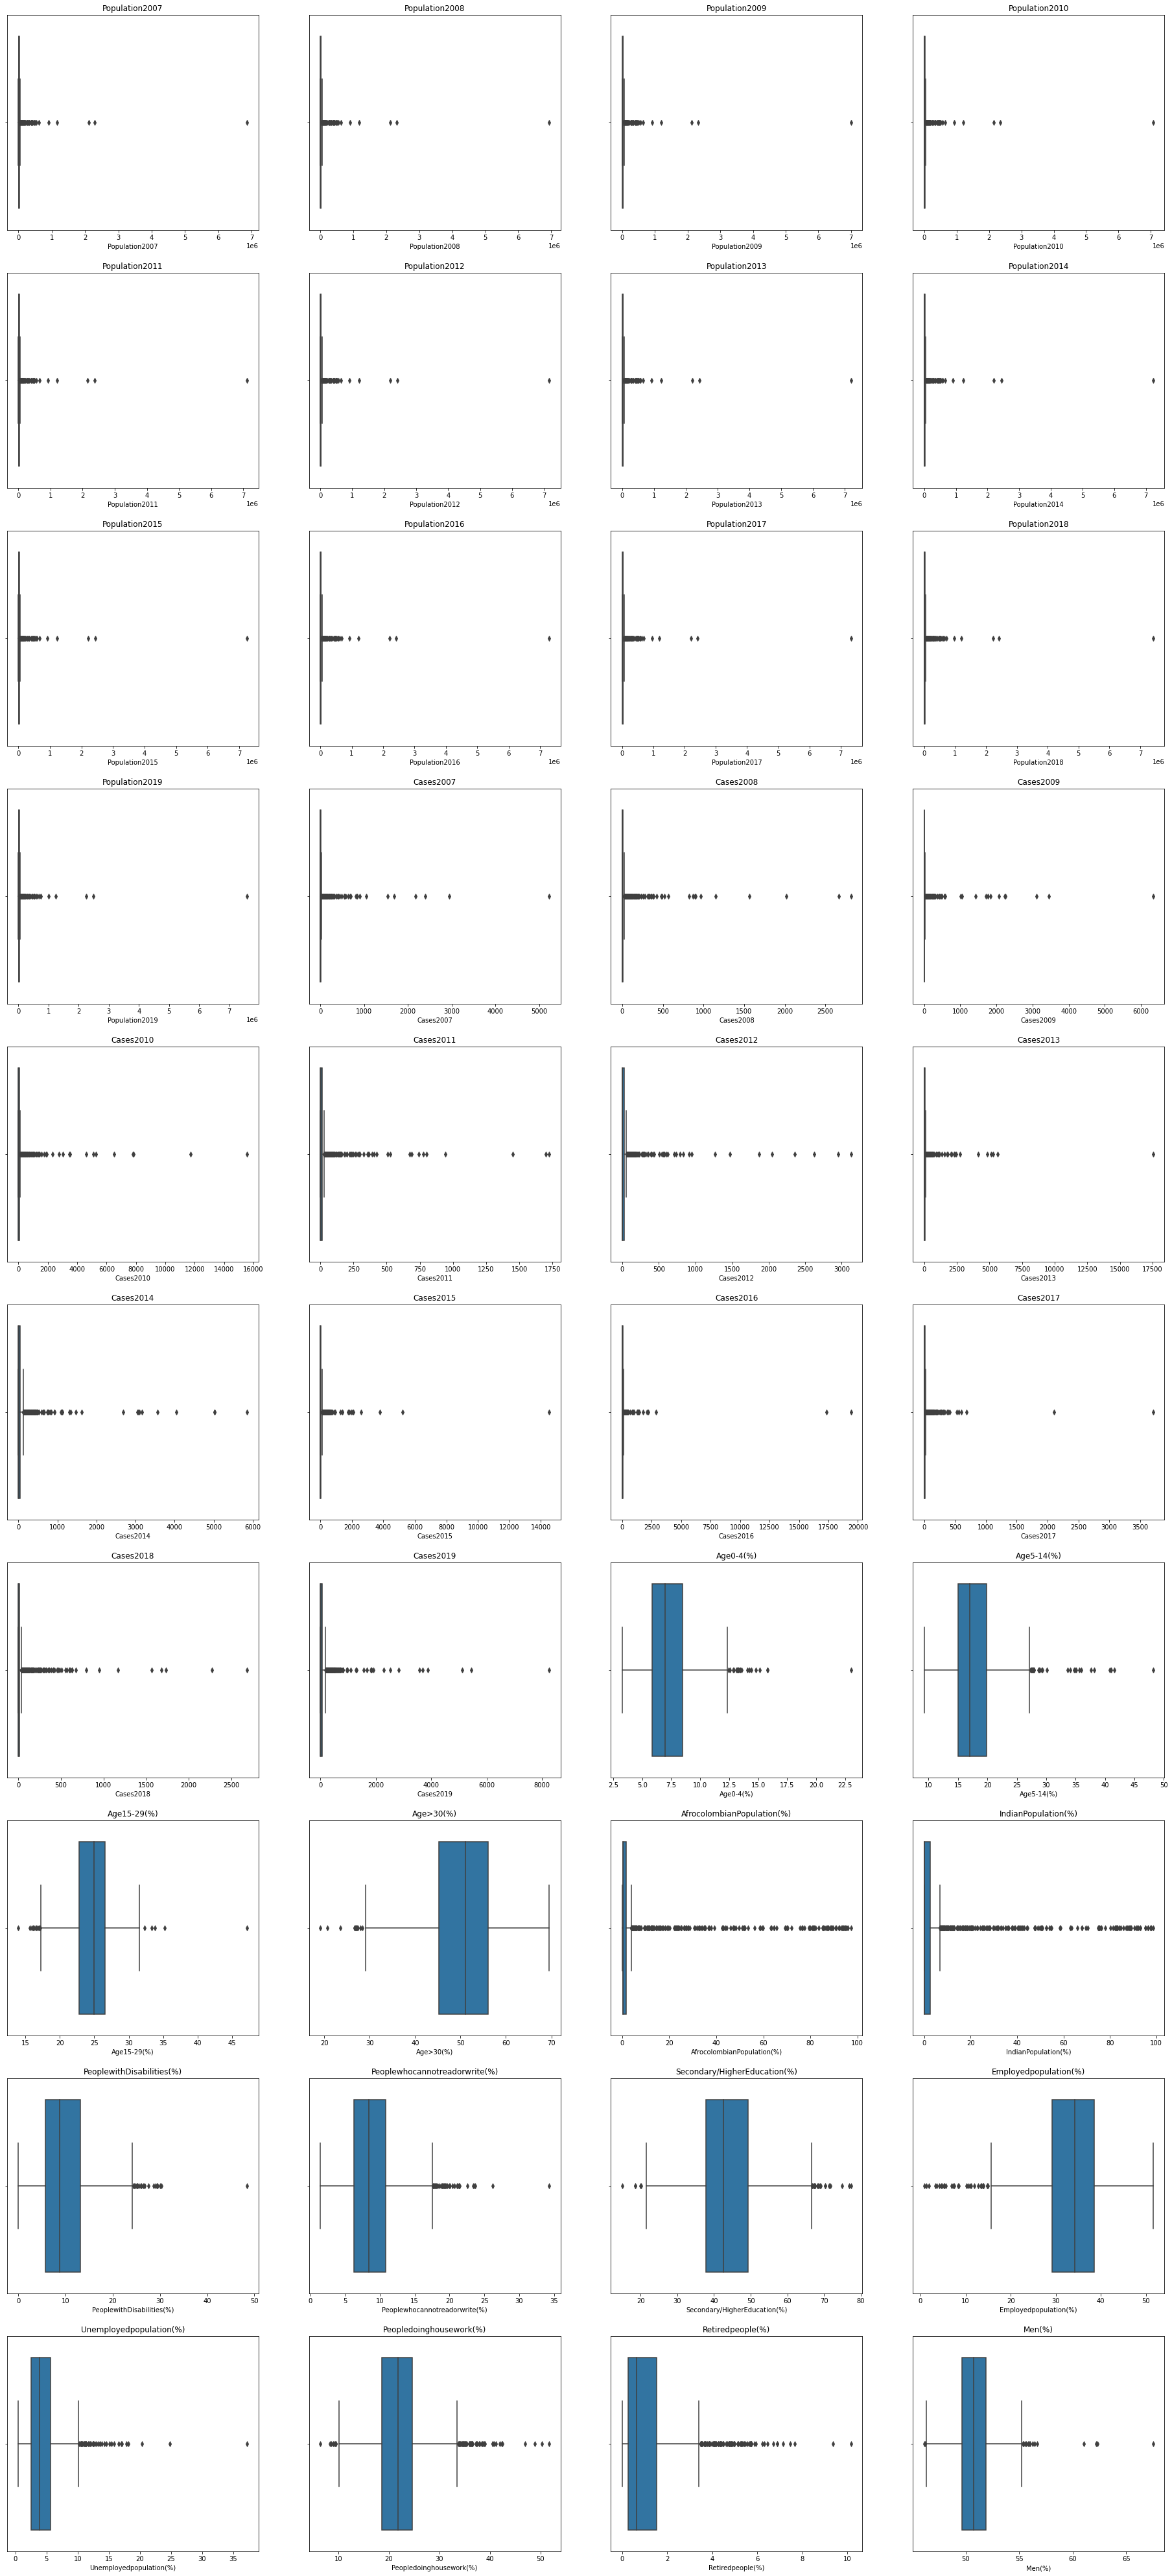

In [15]:
x = 10
y = 4

fig, ax = plt.subplots(x, y, figsize=(32, 72))
col = 0
column = dengue_df.drop(['Municipality code', 'Municipality'], axis=1).columns
for i in range(x):
    for j in range(y):
        sns.boxplot(data=dengue_df, x=column[col], ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

In [16]:
weeks_df = dengue_df[['2007/w01', '2007/w02', '2007/w03', '2007/w04', '2007/w05', '2007/w06', '2007/w07', '2007/w08', '2007/w09', '2007/w10', '2007/w11', '2007/w12', '2007/w13', '2007/w14', '2007/w15', '2007/w16', '2007/w17', '2007/w18', '2007/w19', '2007/w20', '2007/w21', '2007/w22', '2007/w23', '2007/w24', '2007/w25', '2007/w26', '2007/w27', '2007/w28', '2007/w29', '2007/w30', '2007/w31', '2007/w32', '2007/w33', '2007/w34', '2007/w35', '2007/w36', '2007/w37', '2007/w38', '2007/w39', '2007/w40', '2007/w41', '2007/w42', '2007/w43', '2007/w44', '2007/w45', '2007/w46', '2007/w47', '2007/w48', '2007/w49', '2007/w50', '2007/w51', '2007/w52', '2008/w01', '2008/w02', '2008/w03', '2008/w04', '2008/w05', '2008/w06', '2008/w07', '2008/w08', '2008/w09', '2008/w10', '2008/w11', '2008/w12', '2008/w13', '2008/w14', '2008/w15', '2008/w16', '2008/w17', '2008/w18', '2008/w19', '2008/w20', '2008/w21', '2008/w22', '2008/w23', '2008/w24', '2008/w25', '2008/w26', '2008/w27', '2008/w28', '2008/w29', '2008/w30', '2008/w31', '2008/w32', '2008/w33', '2008/w34', '2008/w35', '2008/w36', '2008/w37', '2008/w38', '2008/w39', '2008/w40', '2008/w41', '2008/w42', '2008/w43', '2008/w44', '2008/w45', '2008/w46', '2008/w47', '2008/w48', '2008/w49', '2008/w50', '2008/w51', '2008/w52', '2009/w01', '2009/w02', '2009/w03', '2009/w04', '2009/w05', '2009/w06', '2009/w07', '2009/w08', '2009/w09', '2009/w10', '2009/w11', '2009/w12', '2009/w13', '2009/w14', '2009/w15', '2009/w16', '2009/w17', '2009/w18', '2009/w19', '2009/w20', '2009/w21', '2009/w22', '2009/w23', '2009/w24', '2009/w25', '2009/w26', '2009/w27', '2009/w28', '2009/w29', '2009/w30', '2009/w31', '2009/w32', '2009/w33', '2009/w34', '2009/w35', '2009/w36', '2009/w37', '2009/w38', '2009/w39', '2009/w40', '2009/w41', '2009/w42', '2009/w43', '2009/w44', '2009/w45', '2009/w46', '2009/w47', '2009/w48', '2009/w49', '2009/w50', '2009/w51', '2009/w52', '2010/w01', '2010/w02', '2010/w03', '2010/w04', '2010/w05', '2010/w06', '2010/w07', '2010/w08', '2010/w09', '2010/w10', '2010/w11', '2010/w12', '2010/w13', '2010/w14', '2010/w15', '2010/w16', '2010/w17', '2010/w18', '2010/w19', '2010/w20', '2010/w21', '2010/w22', '2010/w23', '2010/w24', '2010/w25', '2010/w26', '2010/w27', '2010/w28', '2010/w29', '2010/w30', '2010/w31', '2010/w32', '2010/w33', '2010/w34', '2010/w35', '2010/w36', '2010/w37', '2010/w38', '2010/w39', '2010/w40', '2010/w41', '2010/w42', '2010/w43', '2010/w44', '2010/w45', '2010/w46', '2010/w47', '2010/w48', '2010/w49', '2010/w50', '2010/w51', '2010/w52', '2011/w01', '2011/w02', '2011/w03', '2011/w04', '2011/w05', '2011/w06', '2011/w07', '2011/w08', '2011/w09', '2011/w10', '2011/w11', '2011/w12', '2011/w13', '2011/w14', '2011/w15', '2011/w16', '2011/w17', '2011/w18', '2011/w19', '2011/w20', '2011/w21', '2011/w22', '2011/w23', '2011/w24', '2011/w25', '2011/w26', '2011/w27', '2011/w28', '2011/w29', '2011/w30', '2011/w31', '2011/w32', '2011/w33', '2011/w34', '2011/w35', '2011/w36', '2011/w37', '2011/w38', '2011/w39', '2011/w40', '2011/w41', '2011/w42', '2011/w43', '2011/w44', '2011/w45', '2011/w46', '2011/w47', '2011/w48', '2011/w49', '2011/w50', '2011/w51', '2011/w52', '2012/w01', '2012/w02', '2012/w03', '2012/w04', '2012/w05', '2012/w06', '2012/w07', '2012/w08', '2012/w09', '2012/w10', '2012/w11', '2012/w12', '2012/w13', '2012/w14', '2012/w15', '2012/w16', '2012/w17', '2012/w18', '2012/w19', '2012/w20', '2012/w21', '2012/w22', '2012/w23', '2012/w24', '2012/w25', '2012/w26', '2012/w27', '2012/w28', '2012/w29', '2012/w30', '2012/w31', '2012/w32', '2012/w33', '2012/w34', '2012/w35', '2012/w36', '2012/w37', '2012/w38', '2012/w39', '2012/w40', '2012/w41', '2012/w42', '2012/w43', '2012/w44', '2012/w45', '2012/w46', '2012/w47', '2012/w48', '2012/w49', '2012/w50', '2012/w51', '2012/w52', '2013/w01', '2013/w02', '2013/w03', '2013/w04', '2013/w05', '2013/w06', '2013/w07', '2013/w08', '2013/w09', '2013/w10', '2013/w11', '2013/w12', '2013/w13', '2013/w14', '2013/w15', '2013/w16', '2013/w17', '2013/w18', '2013/w19', '2013/w20', '2013/w21', '2013/w22', '2013/w23', '2013/w24', '2013/w25', '2013/w26', '2013/w27', '2013/w28', '2013/w29', '2013/w30', '2013/w31', '2013/w32', '2013/w33', '2013/w34', '2013/w35', '2013/w36', '2013/w37', '2013/w38', '2013/w39', '2013/w40', '2013/w41', '2013/w42', '2013/w43', '2013/w44', '2013/w45', '2013/w46', '2013/w47', '2013/w48', '2013/w49', '2013/w50', '2013/w51', '2013/w52', '2014/w01', '2014/w02', '2014/w03', '2014/w04', '2014/w05', '2014/w06', '2014/w07', '2014/w08', '2014/w09', '2014/w10', '2014/w11', '2014/w12', '2014/w13', '2014/w14', '2014/w15', '2014/w16', '2014/w17', '2014/w18', '2014/w19', '2014/w20', '2014/w21', '2014/w22', '2014/w23', '2014/w24', '2014/w25', '2014/w26', '2014/w27', '2014/w28', '2014/w29', '2014/w30', '2014/w31', '2014/w32', '2014/w33', '2014/w34', '2014/w35', '2014/w36', '2014/w37', '2014/w38', '2014/w39', '2014/w40', '2014/w41', '2014/w42', '2014/w43', '2014/w44', '2014/w45', '2014/w46', '2014/w47', '2014/w48', '2014/w49', '2014/w50', '2014/w51', '2014/w52', '2015/w01', '2015/w02', '2015/w03', '2015/w04', '2015/w05', '2015/w06', '2015/w07', '2015/w08', '2015/w09', '2015/w10', '2015/w11', '2015/w12', '2015/w13', '2015/w14', '2015/w15', '2015/w16', '2015/w17', '2015/w18', '2015/w19', '2015/w20', '2015/w21', '2015/w22', '2015/w23', '2015/w24', '2015/w25', '2015/w26', '2015/w27', '2015/w28', '2015/w29', '2015/w30', '2015/w31', '2015/w32', '2015/w33', '2015/w34', '2015/w35', '2015/w36', '2015/w37', '2015/w38', '2015/w39', '2015/w40', '2015/w41', '2015/w42', '2015/w43', '2015/w44', '2015/w45', '2015/w46', '2015/w47', '2015/w48', '2015/w49', '2015/w50', '2015/w51', '2015/w52', '2016/w01', '2016/w02', '2016/w03', '2016/w04', '2016/w05', '2016/w06', '2016/w07', '2016/w08', '2016/w09', '2016/w10', '2016/w11', '2016/w12', '2016/w13', '2016/w14', '2016/w15', '2016/w16', '2016/w17', '2016/w18', '2016/w19', '2016/w20', '2016/w21', '2016/w22', '2016/w23', '2016/w24', '2016/w25', '2016/w26', '2016/w27', '2016/w28', '2016/w29', '2016/w30', '2016/w31', '2016/w32', '2016/w33', '2016/w34', '2016/w35', '2016/w36', '2016/w37', '2016/w38', '2016/w39', '2016/w40', '2016/w41', '2016/w42', '2016/w43', '2016/w44', '2016/w45', '2016/w46', '2016/w47', '2016/w48', '2016/w49', '2016/w50', '2016/w51', '2016/w52', '2017/w01', '2017/w02', '2017/w03', '2017/w04', '2017/w05', '2017/w06', '2017/w07', '2017/w08', '2017/w09', '2017/w10', '2017/w11', '2017/w12', '2017/w13', '2017/w14', '2017/w15', '2017/w16', '2017/w17', '2017/w18', '2017/w19', '2017/w20', '2017/w21', '2017/w22', '2017/w23', '2017/w24', '2017/w25', '2017/w26', '2017/w27', '2017/w28', '2017/w29', '2017/w30', '2017/w31', '2017/w32', '2017/w33', '2017/w34', '2017/w35', '2017/w36', '2017/w37', '2017/w38', '2017/w39', '2017/w40', '2017/w41', '2017/w42', '2017/w43', '2017/w44', '2017/w45', '2017/w46', '2017/w47', '2017/w48', '2017/w49', '2017/w50', '2017/w51', '2017/w52', '2018/w01', '2018/w02', '2018/w03', '2018/w04', '2018/w05', '2018/w06', '2018/w07', '2018/w08', '2018/w09', '2018/w10', '2018/w11', '2018/w12', '2018/w13', '2018/w14', '2018/w15', '2018/w16', '2018/w17', '2018/w18', '2018/w19', '2018/w20', '2018/w21', '2018/w22', '2018/w23', '2018/w24', '2018/w25', '2018/w26', '2018/w27', '2018/w28', '2018/w29', '2018/w30', '2018/w31', '2018/w32', '2018/w33', '2018/w34', '2018/w35', '2018/w36', '2018/w37', '2018/w38', '2018/w39', '2018/w40', '2018/w41', '2018/w42', '2018/w43', '2018/w44', '2018/w45', '2018/w46', '2018/w47', '2018/w48', '2018/w49', '2018/w50', '2018/w51', '2018/w52', '2019/w01', '2019/w02', '2019/w03', '2019/w04', '2019/w05', '2019/w06', '2019/w07', '2019/w08', '2019/w09', '2019/w10', '2019/w11', '2019/w12', '2019/w13', '2019/w14', '2019/w15', '2019/w16', '2019/w17', '2019/w18', '2019/w19', '2019/w20', '2019/w21', '2019/w22', '2019/w23', '2019/w24', '2019/w25', '2019/w26', '2019/w27', '2019/w28', '2019/w29', '2019/w30', '2019/w31', '2019/w32', '2019/w33', '2019/w34', '2019/w35', '2019/w36', '2019/w37', '2019/w38', '2019/w39', '2019/w40', '2019/w41', '2019/w42', '2019/w43', '2019/w44', '2019/w45', '2019/w46', '2019/w47', '2019/w48', '2019/w49', '2019/w50', '2019/w51', '2019/w52']]
population_df = dengue_df[['Population2007', 'Population2008', 'Population2009', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Population2016', 'Population2017', 'Population2018', 'Population2019']]
casos_df = dengue_df[['Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018', 'Cases2019']]
demo_df = dengue_df[['Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)', 'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)', 'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 'Buildingstratification6(%)', 'NumberofhospitalsperKm2', 'NumberofhousesperKm2']]

In [17]:
dengue_df['Municipality']

0             Medellín
1            Abejorral
2             Abriaquí
3           Alejandría
4                Amagá
             ...      
1116          Yavaraté
1117    Puerto Carreño
1118      La Primavera
1119     Santa Rosalía
1120          Cumaribo
Name: Municipality, Length: 1120, dtype: object

In [18]:
weeks_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120],
           dtype='int64', length=1120)

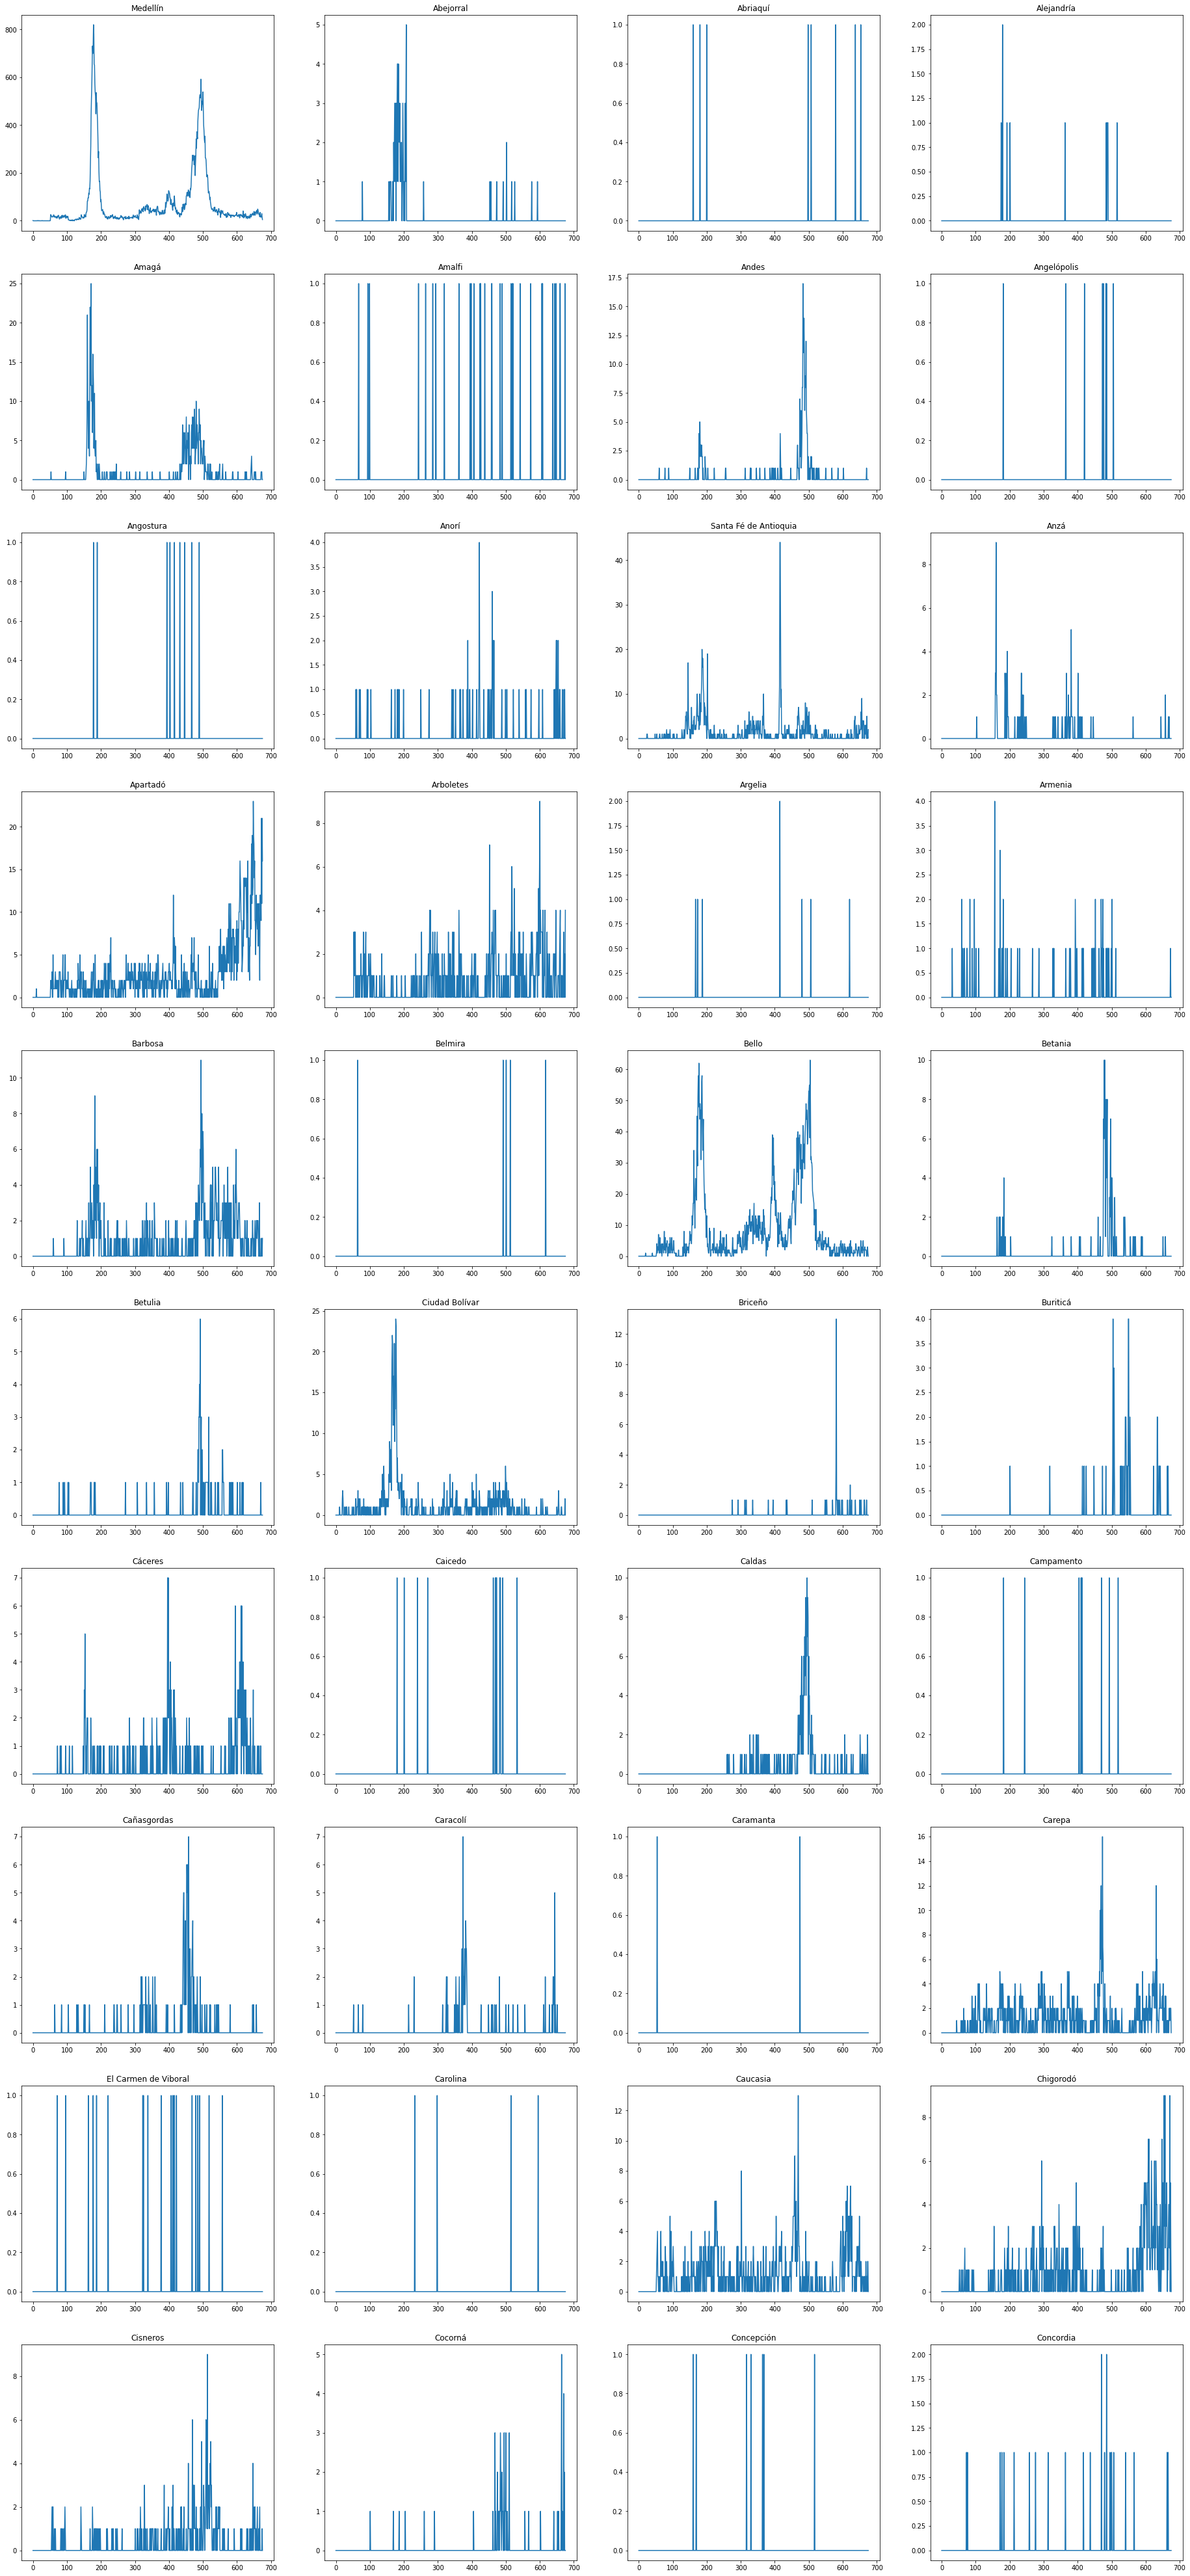

In [19]:
x = 10
y = 4

fig, ax = plt.subplots(x, y, figsize=(32, 72))
index = 0
rows = weeks_df.index
for i in range(x):
    for j in range(y):
        ax[i][j].plot(range(len(weeks_df.columns)), weeks_df.iloc[index, :].values)
        ax[i][j].set_title(*[dengue_df['Municipality'][index]])
        index+=1

Text(0.5, 1.0, 'Medellín')

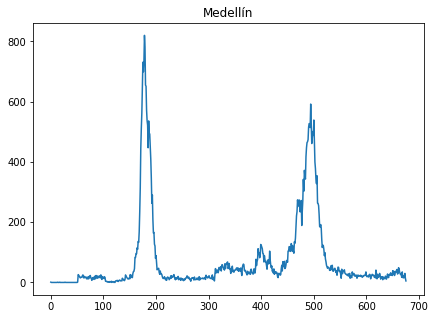

In [20]:
index = 0
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(range(len(weeks_df.columns)), weeks_df.iloc[index, :].values)
ax.set_title(*[dengue_df['Municipality'][index]])

C:\Users\ce00021\AppData\Local\Temp\ipykernel_22712\3969545253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducidaini['ratioPoblacionCasos']=reducidaini['Cases2019']/reducidaini['Population2019']


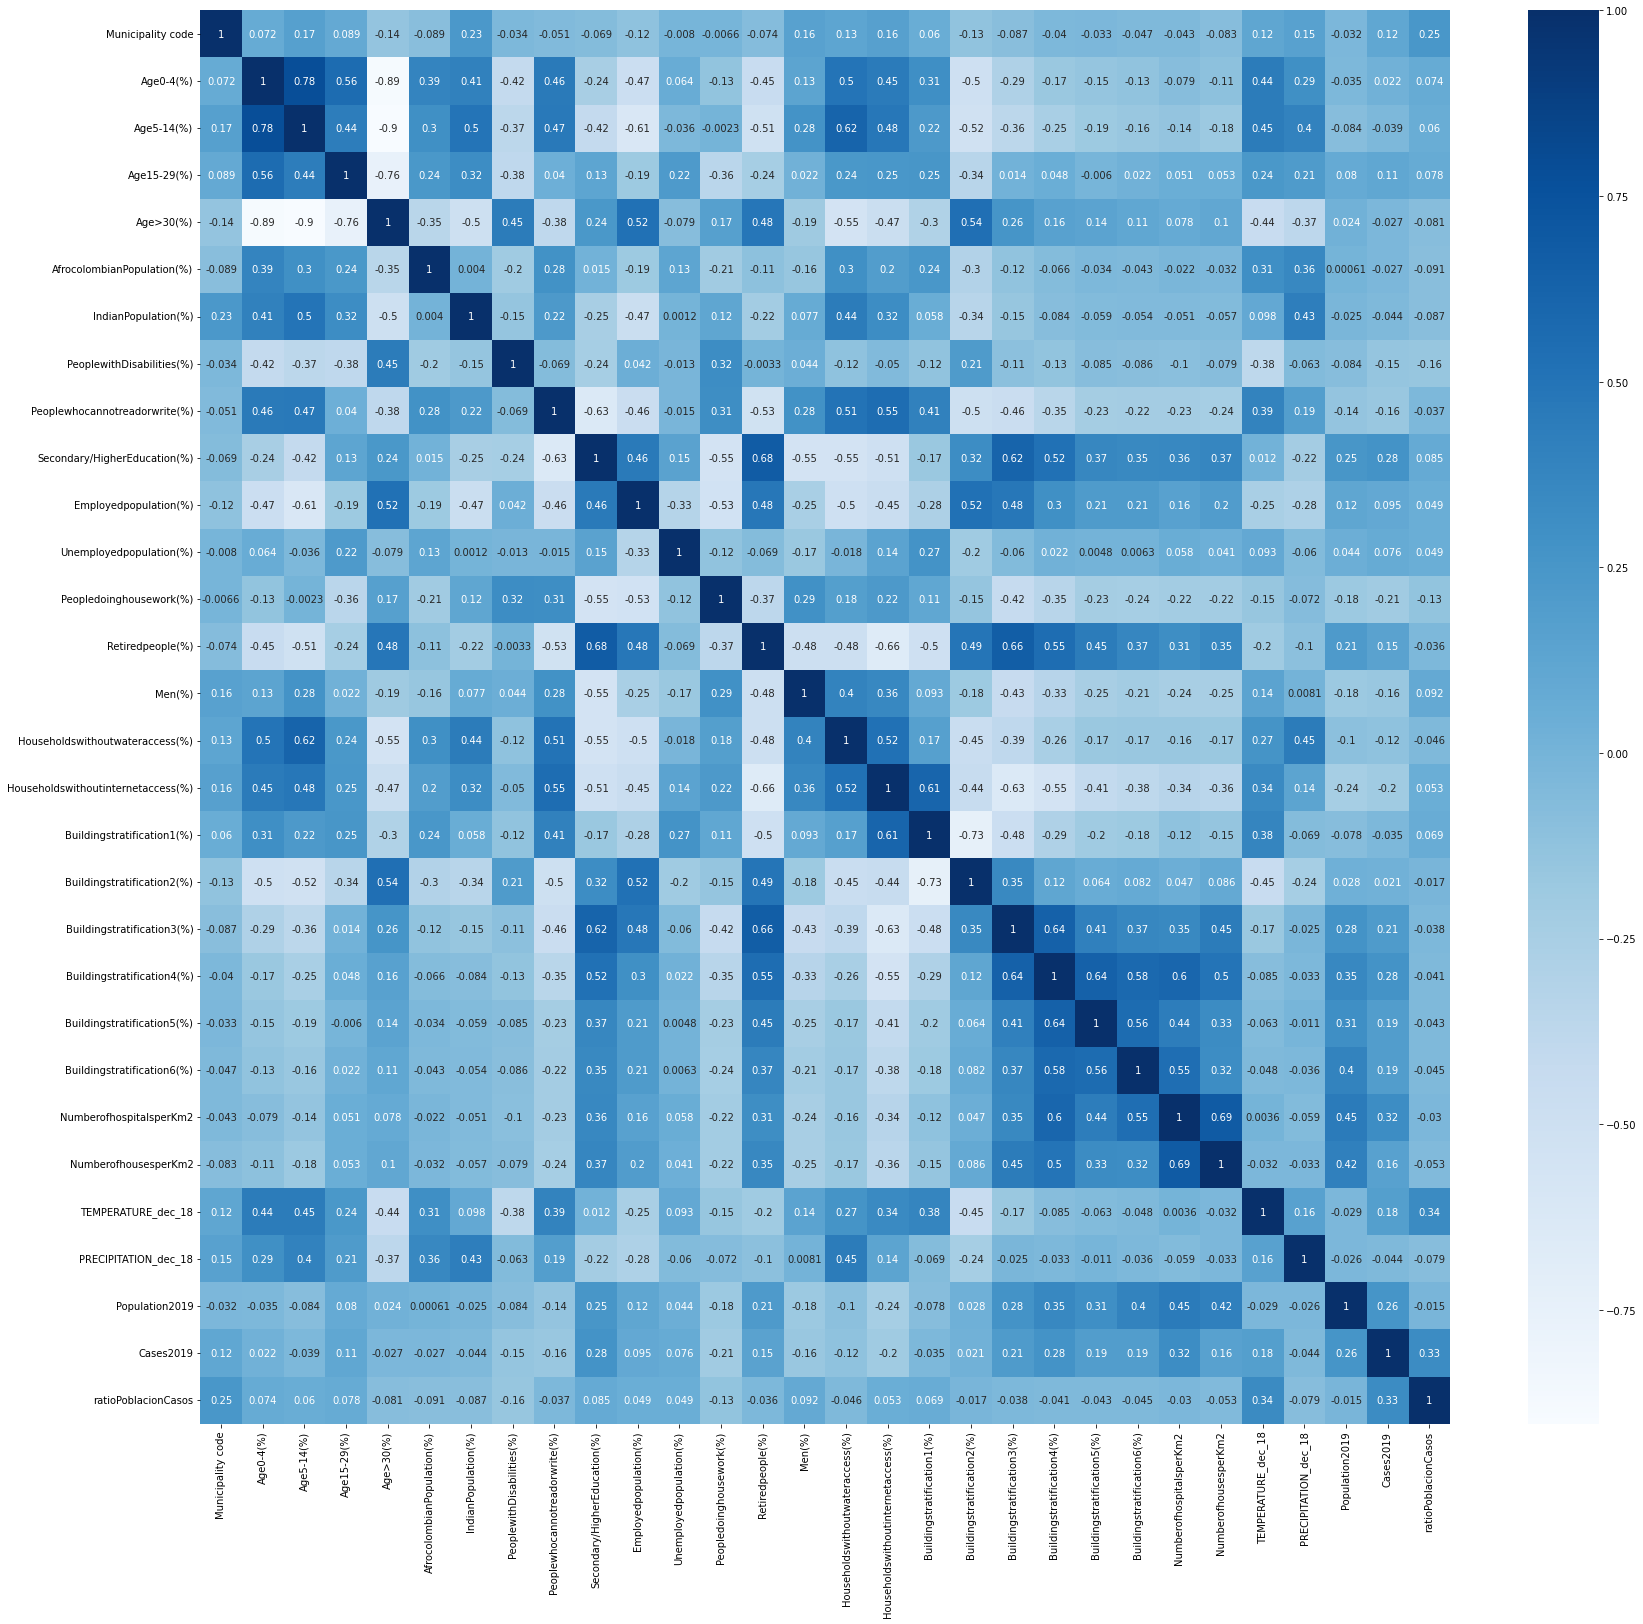

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipality code                   1121 non-null   int64  
 1   Age0-4(%)                           1121 non-null   float64
 2   Age5-14(%)                          1121 non-null   float64
 3   Age15-29(%)                         1121 non-null   float64
 4   Age>30(%)                           1121 non-null   float64
 5   AfrocolombianPopulation(%)          1121 non-null   float64
 6   IndianPopulation(%)                 1121 non-null   float64
 7   PeoplewithDisabilities(%)           1121 non-null   float64
 8   Peoplewhocannotreadorwrite(%)       1121 non-null   float64
 9   Secondary/HigherEducation(%)        1121 non-null   float64
 10  Employedpopulation(%)               1121 non-null   float64
 11  Unemployedpopulation(%)             1121 no

In [262]:

reducidaini=(dengue_df[['Municipality code','Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)','AfrocolombianPopulation(%)', 
'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 
'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 
'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 
'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 
'Buildingstratification6(%)', 'NumberofhospitalsperKm2', 'NumberofhousesperKm2','TEMPERATURE_dec_18','PRECIPITATION_dec_18',
'Population2019','Cases2019']])

reducidaini['ratioPoblacionCasos']=reducidaini['Cases2019']/reducidaini['Population2019']

import seaborn as sns
import matplotlib.pyplot as plt
X=reducidaini.copy()

corr_df = X.corr(method='pearson')

plt.figure(figsize=(28, 26))
sns.heatmap(corr_df, annot=True, cmap="Blues")

plt.show()


reducida=(reducidaini[['Municipality code', 'Age>30(%)','AfrocolombianPopulation(%)', 
'IndianPopulation(%)', 'Secondary/HigherEducation(%)','Men(%)', 'NumberofhousesperKm2','TEMPERATURE_dec_18','PRECIPITATION_dec_18',
'Population2019','Cases2019','ratioPoblacionCasos']])

reducidaini.iloc[:,0:19].info()



In [263]:
print(reducidaini.iloc[:,19:].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Buildingstratification3(%)  1121 non-null   float64
 1   Buildingstratification4(%)  1121 non-null   float64
 2   Buildingstratification5(%)  1121 non-null   float64
 3   Buildingstratification6(%)  1121 non-null   float64
 4   NumberofhospitalsperKm2     1121 non-null   float64
 5   NumberofhousesperKm2        1121 non-null   float64
 6   TEMPERATURE_dec_18          1120 non-null   float64
 7   PRECIPITATION_dec_18        1120 non-null   float64
 8   Population2019              1121 non-null   int64  
 9   Cases2019                   1121 non-null   int64  
 10  ratioPoblacionCasos         1121 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 96.5 KB
None


In [264]:
from asyncio.windows_events import NULL
from cmath import nan

valoresNulos=reducida[np.isnan(reducida['TEMPERATURE_dec_18']) | np.isnan(reducida['PRECIPITATION_dec_18'])][['Municipality code','TEMPERATURE_dec_18','PRECIPITATION_dec_18']]
display(valoresNulos)

reducidalimpia=reducida[reducida['Municipality code']!=47570]
reducidalimpia.describe()

,Municipality code,TEMPERATURE_dec_18,PRECIPITATION_dec_18
674,47570,NaN,NaN


,Municipality code,Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),Secondary/HigherEducation(%),Men(%),NumberofhousesperKm2,TEMPERATURE_dec_18,PRECIPITATION_dec_18,Population2019,Cases2019,ratioPoblacionCasos
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1120.000000,1120.000000
mean,38658.553571,50.217250,7.052393,7.360429,44.003848,50.814777,44.794701,21.347664,49.733369,4.407453e+04,113.231250,0.003060
std,26544.627772,7.752337,19.319731,19.075145,9.310005,1.879361,211.096720,5.610472,57.995459,2.601129e+05,443.491883,0.005449
min,5001.000000,19.130000,0.000000,0.000000,15.020000,46.110000,0.010674,4.183894,0.902079,2.880000e+02,0.000000,0.000000
25%,15675.250000,45.182500,0.180000,0.030000,37.730000,49.620000,5.264703,17.057504,17.721469,6.636500e+03,1.000000,0.000051
50%,25831.000000,51.045000,0.410000,0.140000,42.555000,50.740000,11.735330,21.834375,37.102827,1.281500e+04,10.000000,0.000759
75%,66485.000000,56.035000,1.617500,2.715000,49.290000,51.890000,24.145374,26.829089,60.799553,2.747125e+04,75.000000,0.003531
max,99773.000000,69.500000,97.300000,98.580000,77.330000,67.510000,4876.176471,28.674008,609.078796,7.592871e+06,8258.000000,0.047612


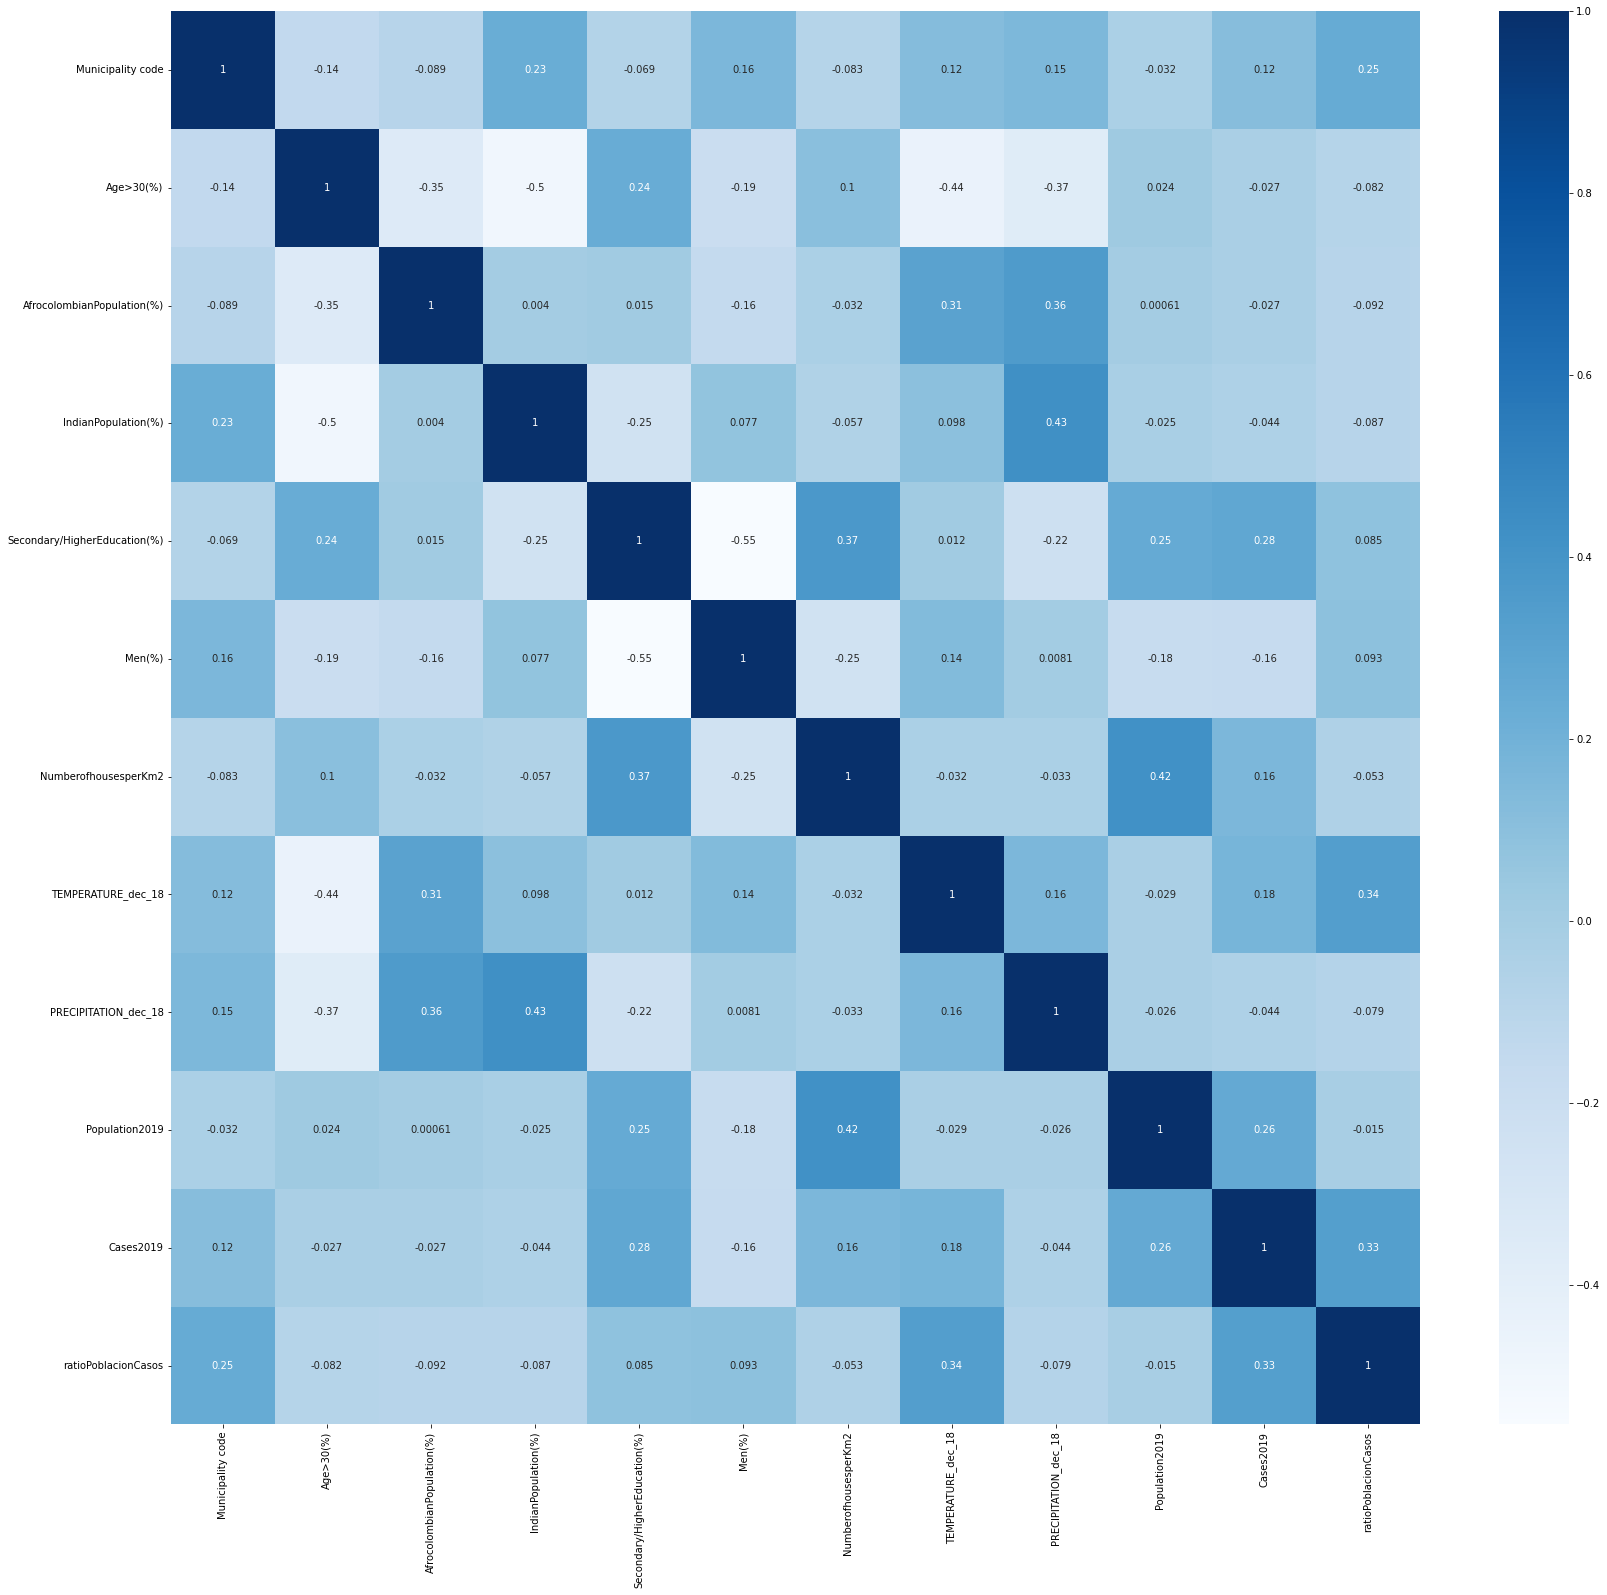

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

X=reducidalimpia.copy()


corr_df = X.corr(method='pearson')

plt.figure(figsize=(28, 26))
sns.heatmap(corr_df, annot=True, cmap="Blues")

plt.show()

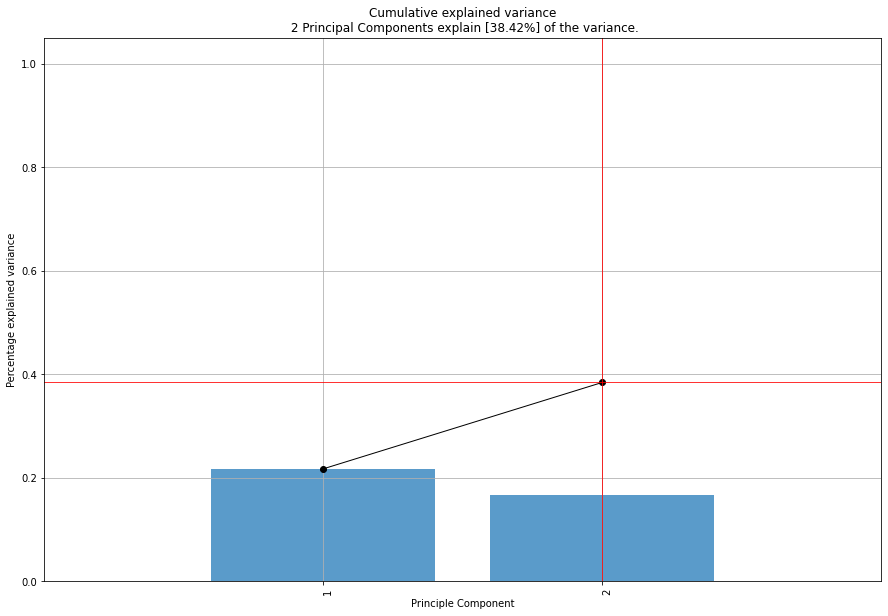

,PC1,PC2
Municipality code,-0.198766,0.130946
Age>30(%),0.441351,-0.285166
AfrocolombianPopulation(%),-0.184249,0.279625
IndianPopulation(%),-0.366064,0.128410
Secondary/HigherEducation(%),0.403368,0.333410
Men(%),-0.316604,-0.265333
NumberofhousesperKm2,0.280432,0.304709
TEMPERATURE_dec_18,-0.257010,0.378506
PRECIPITATION_dec_18,-0.352415,0.204879
Population2019,0.218563,0.331855


<Figure size 432x288 with 0 Axes>

In [266]:
from pca import pca

model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(X)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)




0.36209003008344937


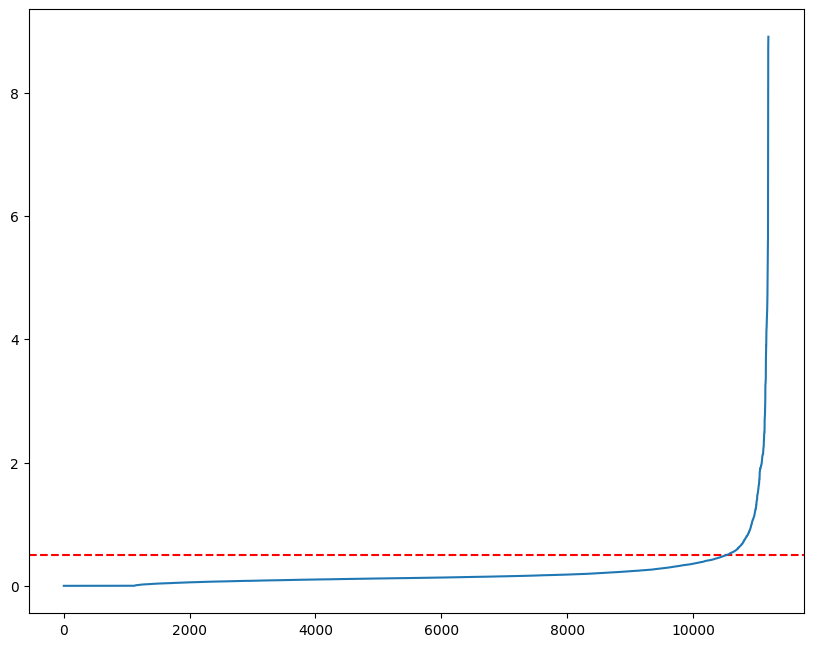

In [267]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(results['PC'])
distancias, indices = nbrs.kneighbors(results['PC'])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])




,0,1,Cluster
0,7.481566,7.976236,-1
1,0.316350,-1.716989,0
2,0.279068,-1.491681,0
3,0.592672,-0.920740,0
4,1.301039,-0.142358,0
...,...,...,...
1115,-6.045565,2.024635,-1
1116,-1.979518,1.376250,0
1117,-2.464546,0.857448,0
1118,-2.244656,0.892078,0


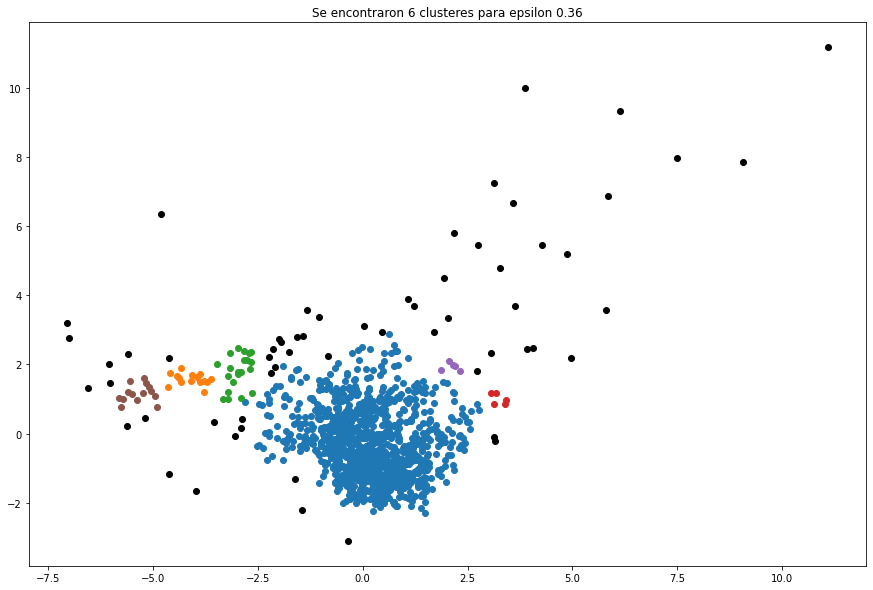

In [268]:
from sklearn.cluster import DBSCAN
X=results['PC'].to_numpy()


db = DBSCAN(eps = 0.364, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.364))

resultado

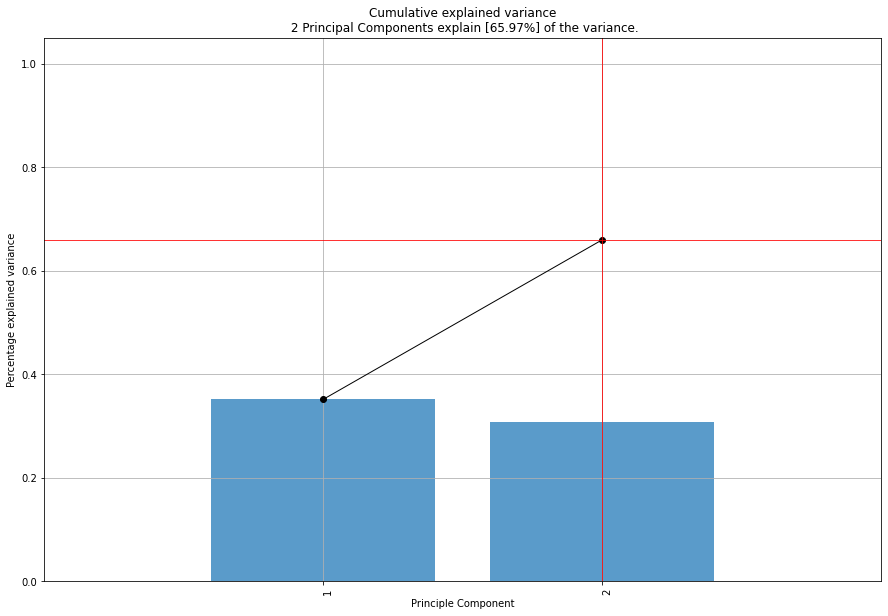

,PC1,PC2
Municipality code,-0.343204,0.595059
Secondary/HigherEducation(%),0.636586,0.335174
NumberofhousesperKm2,0.671481,0.157919
ratioPoblacionCasos,-0.161503,0.713179


0.1735967570266891


,0,1,Cluster
0,8.663865,1.295856,-1
1,-0.286915,-1.553532,0
2,0.487244,-1.028955,0
3,0.055505,-1.370039,0
4,1.219581,-0.767529,-1
...,...,...,...
1116,-1.575421,0.495993,-1
1117,-0.943224,2.393318,7
1118,-1.432029,1.995627,-1
1119,-1.172435,1.859109,-1


<Figure size 432x288 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

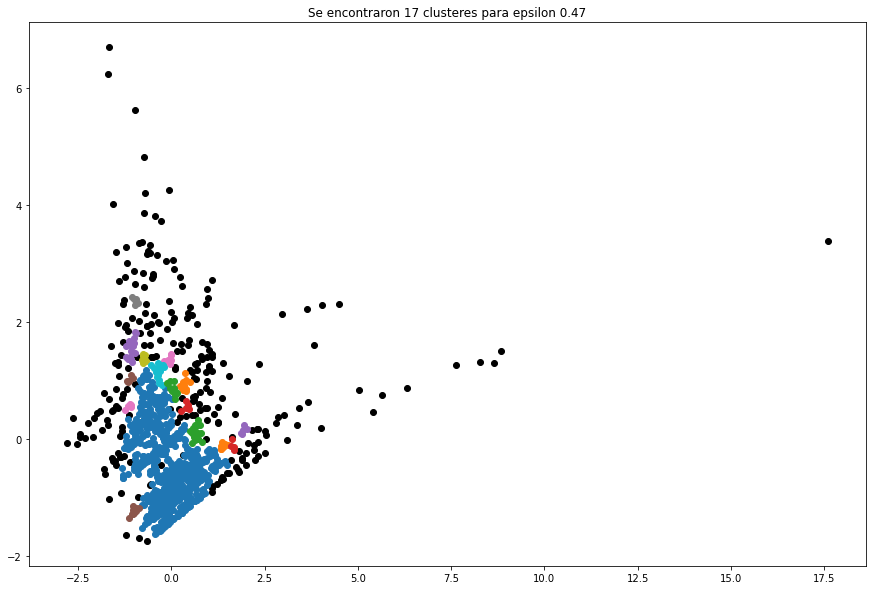

In [269]:
X_pocasfeatures=reducida[["Municipality code",'Secondary/HigherEducation(%)','NumberofhousesperKm2','ratioPoblacionCasos']]
model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(X_pocasfeatures)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)

neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(results['PC'])
distancias, indices = nbrs.kneighbors(results['PC'])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.axhline(y = 0.5, color = 'r', linestyle = '--')
#plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])


from sklearn.cluster import DBSCAN
X=results['PC'].to_numpy()


db = DBSCAN(eps = 0.13, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.47))

resultado



0.061264583495267734


,0,1,Cluster
0,-0.467409,9.749949,-1
1,-0.561736,-0.155681,0
2,-0.426242,-0.200218,0
3,-0.561736,-0.169202,0
4,-0.466291,0.274680,0
...,...,...,...
1115,-0.561736,-0.212159,0
1116,1.357246,-0.210245,5
1117,1.161981,-0.211758,5
1118,0.816334,-0.211120,0


<Figure size 1000x800 with 0 Axes>

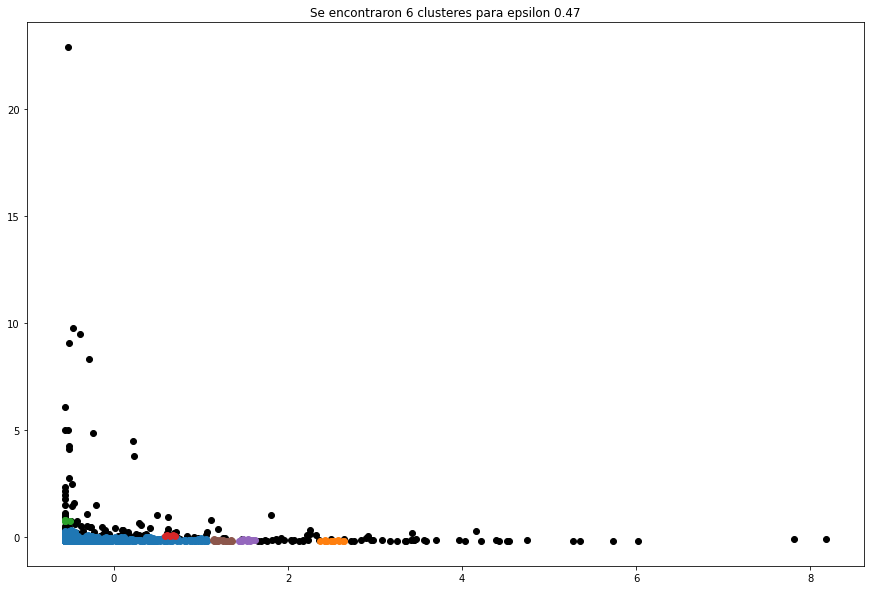

In [277]:
from sklearn.preprocessing import StandardScaler

#Estandarizamos antes de hacer el analisis de SVD

scaler = StandardScaler()
X_2features = pd.DataFrame(scaler.fit_transform(reducidalimpia[["ratioPoblacionCasos","NumberofhousesperKm2"]]), index=reducidalimpia['Municipality code'],    columns=["ratioPoblacionCasos","NumberofhousesperKm2"])
#X_2features= X_2features[X_2features.Population2019<0]


neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(X_2features)
distancias, indices = nbrs.kneighbors(X_2features)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.axhline(y = 0.5, color = 'r', linestyle = '--')
#plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])


from sklearn.cluster import DBSCAN
X=X_2features.to_numpy()


db = DBSCAN(eps = 0.0612, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.47))

resultado

In [276]:
display(X_2features.sort_values('ratioPoblacionCasos', ascending=False))
display(X_2features.sort_values('NumberofhousesperKm2', ascending=False))

X_2features.describe()

,ratioPoblacionCasos,NumberofhousesperKm2
Municipality code,,
73671,8.179653,-0.115892
68147,7.815458,-0.104110
50689,6.023098,-0.206626
91001,5.728474,-0.203565
25438,5.357732,-0.206432
...,...,...
15822,-0.561736,-0.190726
68425,-0.561736,-0.183342
15832,-0.561736,-0.180158


,ratioPoblacionCasos,NumberofhousesperKm2
Municipality code,,
5360,-0.525508,22.897277
5001,-0.467409,9.749949
8758,-0.385929,9.466803
5631,-0.518782,9.052052
8001,-0.287760,8.293059
...,...,...
91530,-0.561736,-0.212204
97777,-0.561736,-0.212212
91536,-0.561736,-0.212219


,ratioPoblacionCasos,NumberofhousesperKm2
count,1.120000e+03,1.120000e+03
mean,2.537653e-17,2.537653e-17
std,1.000447e+00,1.000447e+00
min,-5.617364e-01,-2.122441e-01
25%,-5.523397e-01,-1.873438e-01
50%,-4.223795e-01,-1.566777e-01
75%,8.650748e-02,-9.786297e-02
max,8.179653e+00,2.289728e+01
